In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [2]:
# Load your dataset
# Replace 'your_dataset.csv' with the actual path to your dataset
df = pd.read_csv('parkinsons.csv')

In [6]:
# Exploring Dataset Content
df.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

In [9]:
df.tail()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
190           0.00003   0.00263   0.00259     0.00790       0.04087  ...   
191           0.00003   0.00331   0.00292     0.00994       0.02751  ...   
192           0.00008   0.00624   0.00564     0.01873       0.02308  ...   
193           0.00004   0.00370   0.00390     0.01109       0.02296  ...   
194           0.00003   0.00295   0.00317     0.00885       0.01884  ...   

     Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
190      0.07008  0.02764  19.517       0  0.448439  0.657899 -6.538586   
191      0.04812  0.01810  19.147       0  0.431674  0.683244 -6.195325   
192      0.03804  0.10715  17.883       0  0.407567  0.655683 -6.787197   
193      0.03794  0.07223  19.020       0  0.451221  0.643956 -6.744577   
194      0.03078  0.04398  21.209       0  0.462803  0.664357 -5.724056   

      spread2        D2       PPE  
190  0.121952  2.657476  0.133050  
191  0.129303  2.784312  0.168895  
192  0.158453  2.679772  0.131728  
193  0.207454  2.138608  0.123306  
194  0.190667  2.555477  0.148569  

[5 rows x 24 columns]

In [10]:
print('Number of Features In Dataset :', df.shape[1])
print('Number of Instances In Dataset : ', df.shape[0])

Number of Features In Dataset : 24
Number of Instances In Dataset :  195


In [11]:
# Dropping The Name Column
# df = pd.read_csv('parkinsons.csv')
df.drop(['name'], axis=1, inplace=True)

In [12]:
# Assuming 'status' is the target variable and the rest are features
data= pd.read_csv('parkinsons.csv')
X = data.drop('status', axis=1)
X = data.drop(columns=['name','status'], axis=1)


In [9]:
print('Number of Features In Dataset :', df.shape[1])
print('Number of Instances In Dataset : ', df.shape[0])

Number of Features In Dataset : 23
Number of Instances In Dataset :  195


In [10]:
# Exploring Information About Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

In [11]:
df.describe()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000020    0.001660    0.001860    0.004985      0.016505   
50%            0.000030    0.002500    0.002690    0.007490      0.022970   
75%            0.000060    0.003835    0.003955    0.011505      0.037885   
max            0.000260    0.021440    0.019580    0.064330      0.119080   

       MDVP:Shimmer(dB)  ...  Shimmer:DDA         NHR         HNR      status  \
count        195.000000  ...   195.000000  195.000000  195.000000  195.000000   
mean           0.282251  ...     0.046993    0.024847   21.885974    0.753846   
std            0.194877  ...     0.030459    0.040418    4.425764    0.431878   
min            0.085000  ...     0.013640    0.000650    8.441000    0.000000   
25%            0.148500  ...     0.024735    0.005925   19.198000    1.000000   
50%            0.221000  ...     0.038360    0.011660   22.085000    1.000000   
75%            0.350000  ...     0.060795    0.025640   25.075500    1.000000   
max            1.302000  ...     0.169420    0.314820   33.047000    1.000000   

             RPDE         DFA     spread1     spread2          D2         PPE  
count  195.000000  195.000000  195.000000  195.000000  195.000000  195.000000  
mean     0.498536    0.718099   -5.684397    0.226510    2.381826    0.206552  
std      0.103942    0.055336    1.090208    0.083406    0.382799    0.090119  
min      0.256570    0.574282   -7.964984    0.006274    1.423287    0.044539  
25%      0.421306    0.674758   -6.450096    0.174351    2.099125    0.137451  
50%      0.495954    0.722254   -5.720868    0.218885    2.361532    0.194052  
75%      0.587562    0.761881   -5.046192    0.279234    2.636456    0.252980  
max      0.685151    0.825288   -2.434031    0.450493    3.671155    0.527367  

[8 rows x 23 columns]

In [13]:
df['status'] = df['status'].astype('uint8')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    uint8  
 1

In [14]:
# Checking For Duplicate Rows In Dataset
print('Number of Duplicated Rows :',df.duplicated().sum())

Number of Duplicated Rows : 0


In [15]:
# Checking For Missing Values In Dataset
df.isna().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

<Axes: xlabel='status', ylabel='count'>

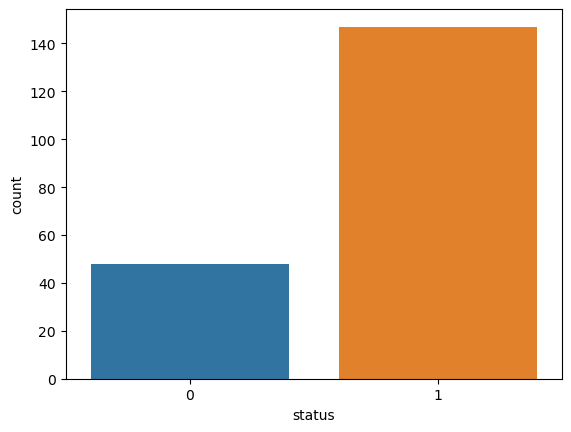

In [15]:
#Balance of Data
import seaborn as sns
sns.countplot(x='status',data=df)

<Axes: >

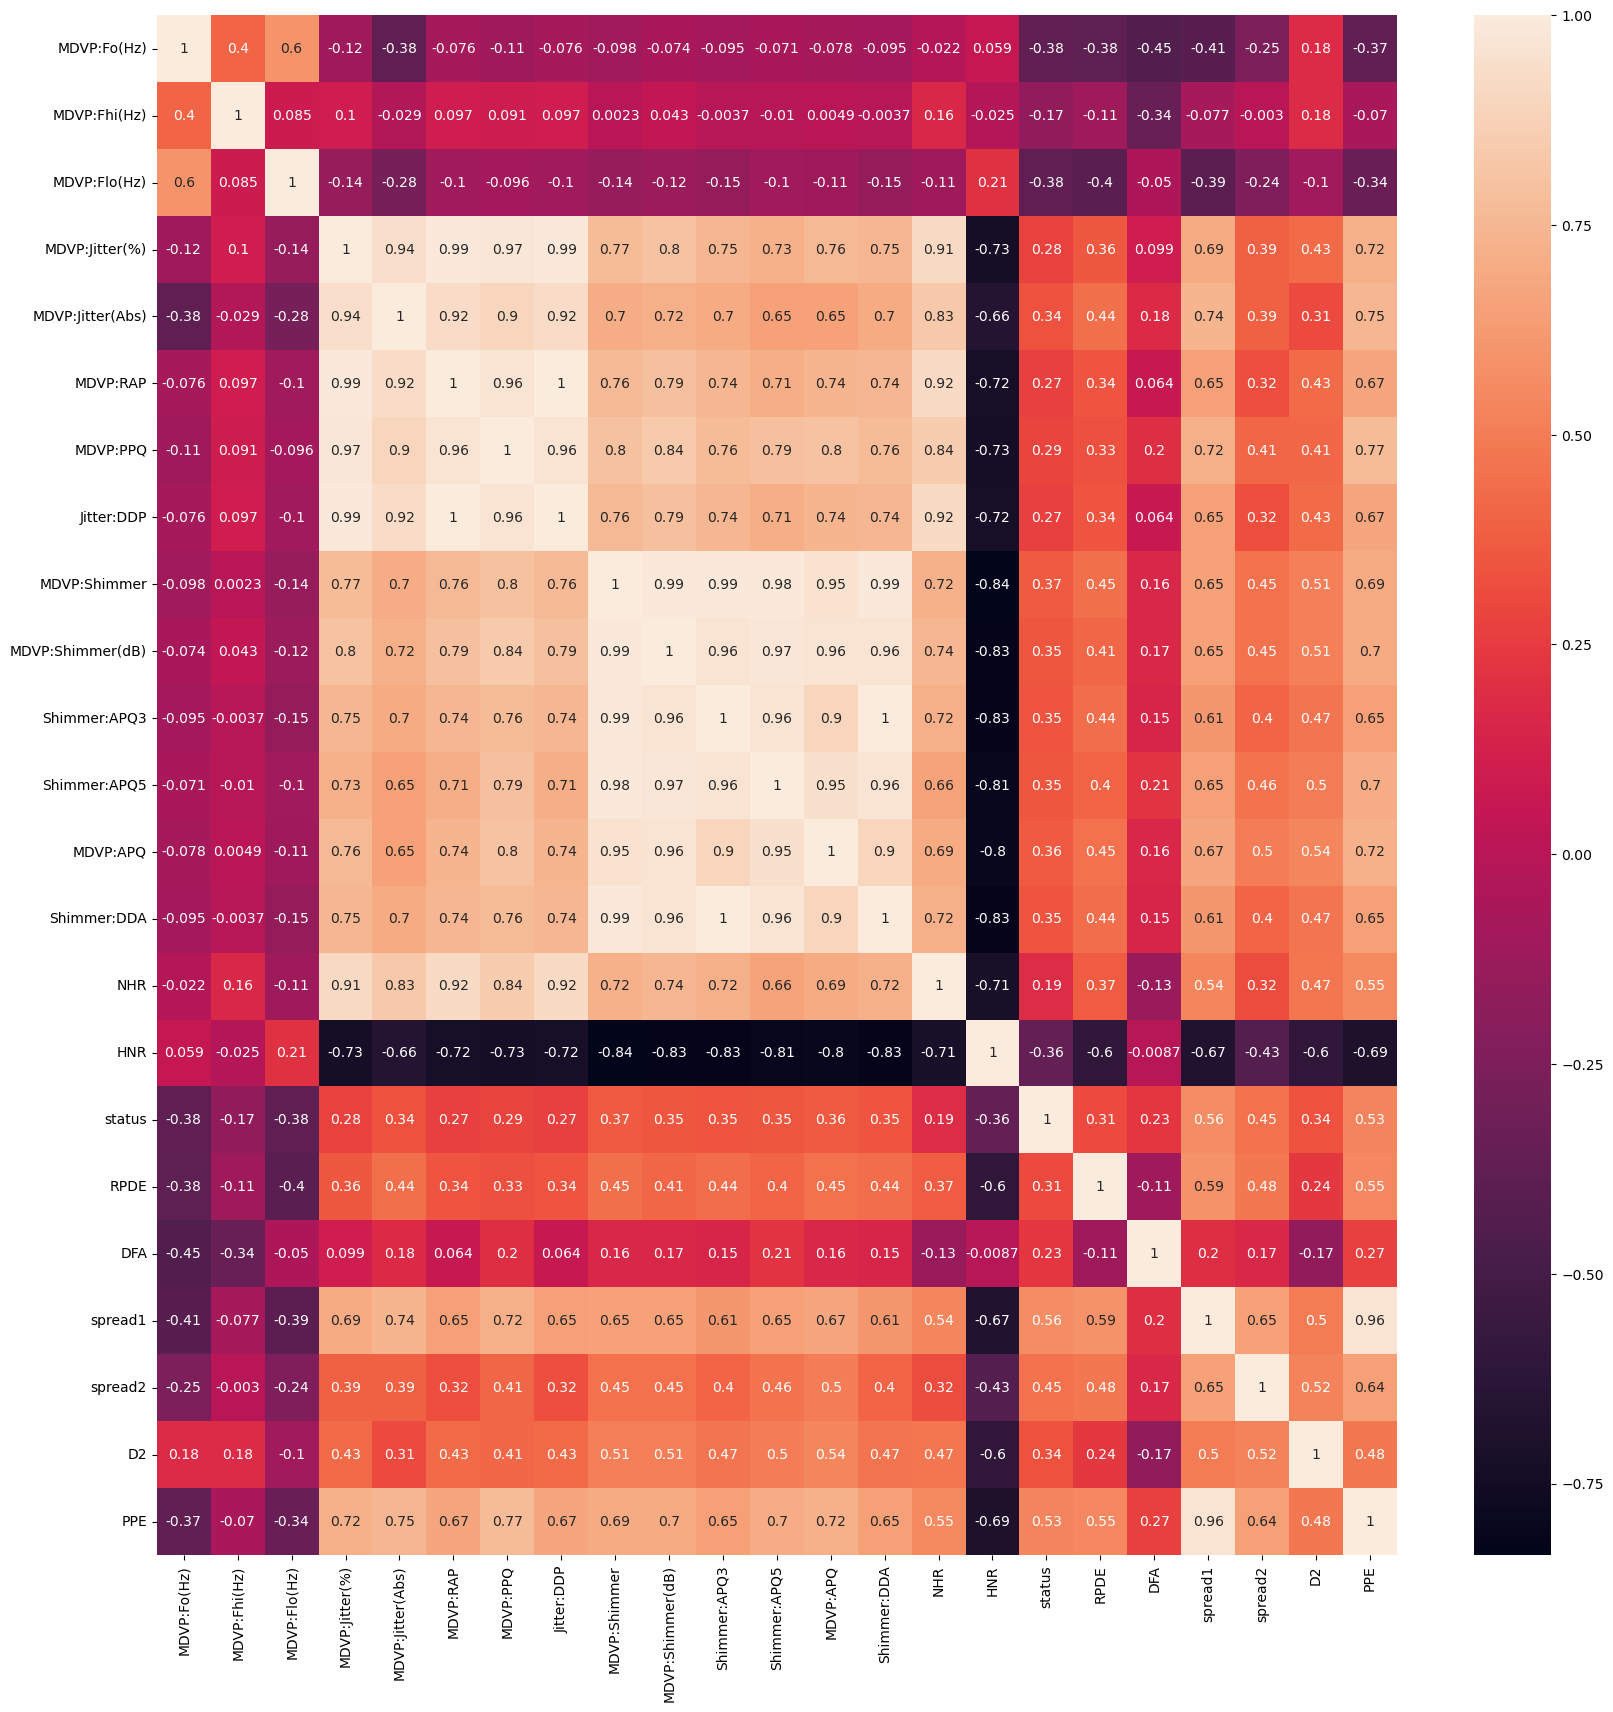

In [17]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(df.corr(),annot=True,ax=ax)

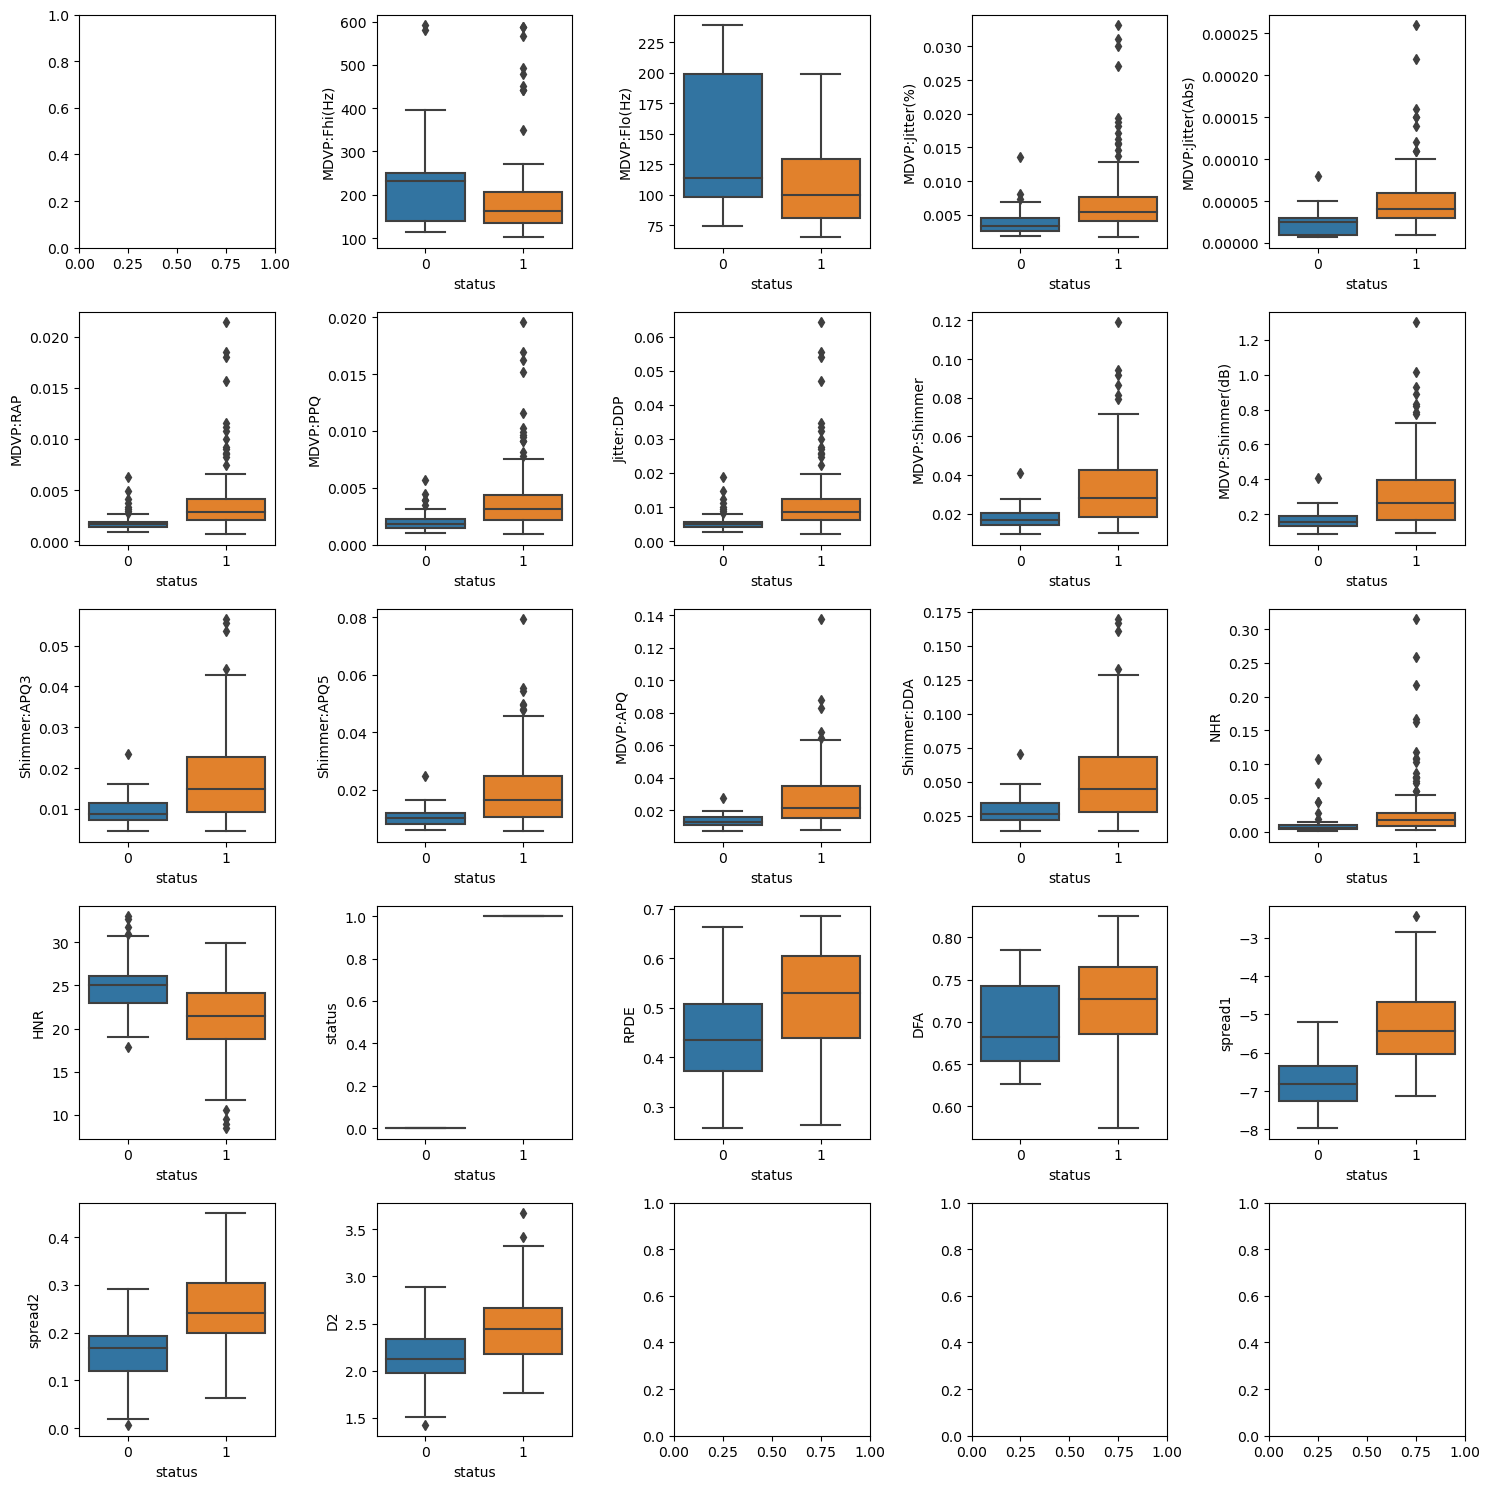

In [18]:
#Box Plot
fig,axes=plt.subplots(5,5,figsize=(15,15))
axes=axes.flatten()

for i in range(1,len(df.columns)-1):
    sns.boxplot(x='status',y=df.iloc[:,i],data=df,orient='v',ax=axes[i])
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


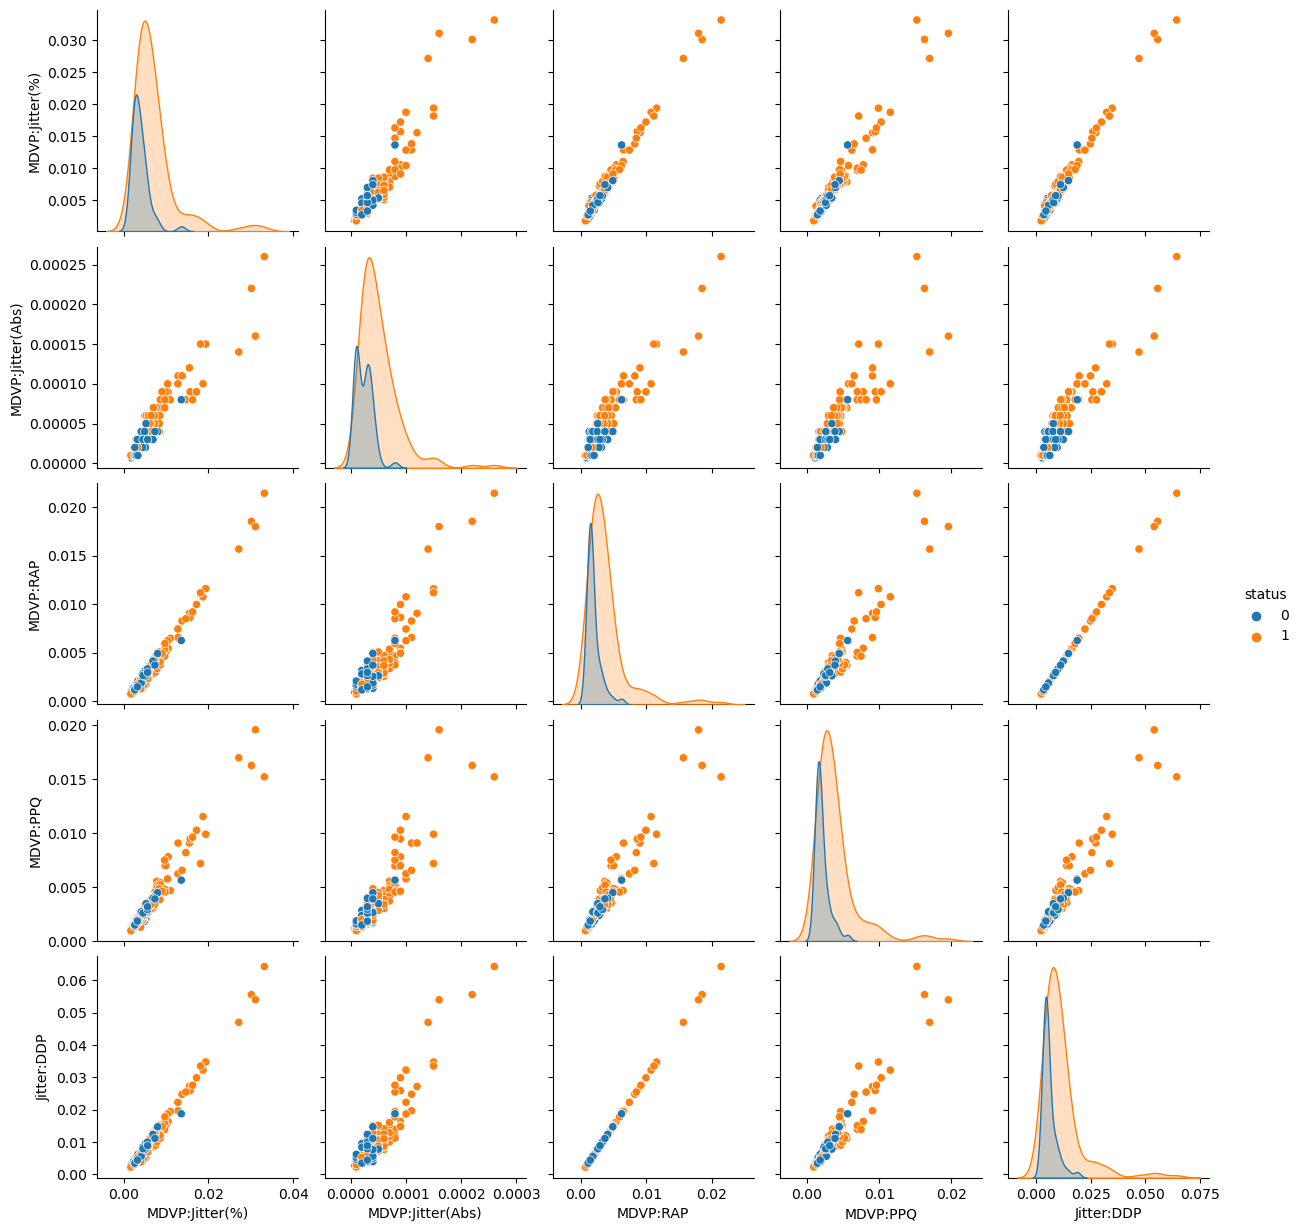

In [19]:
plt.rcParams['figure.figsize'] = (15, 4)
sns.pairplot(df,hue = 'status', vars = ['MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ', 'Jitter:DDP'] )
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


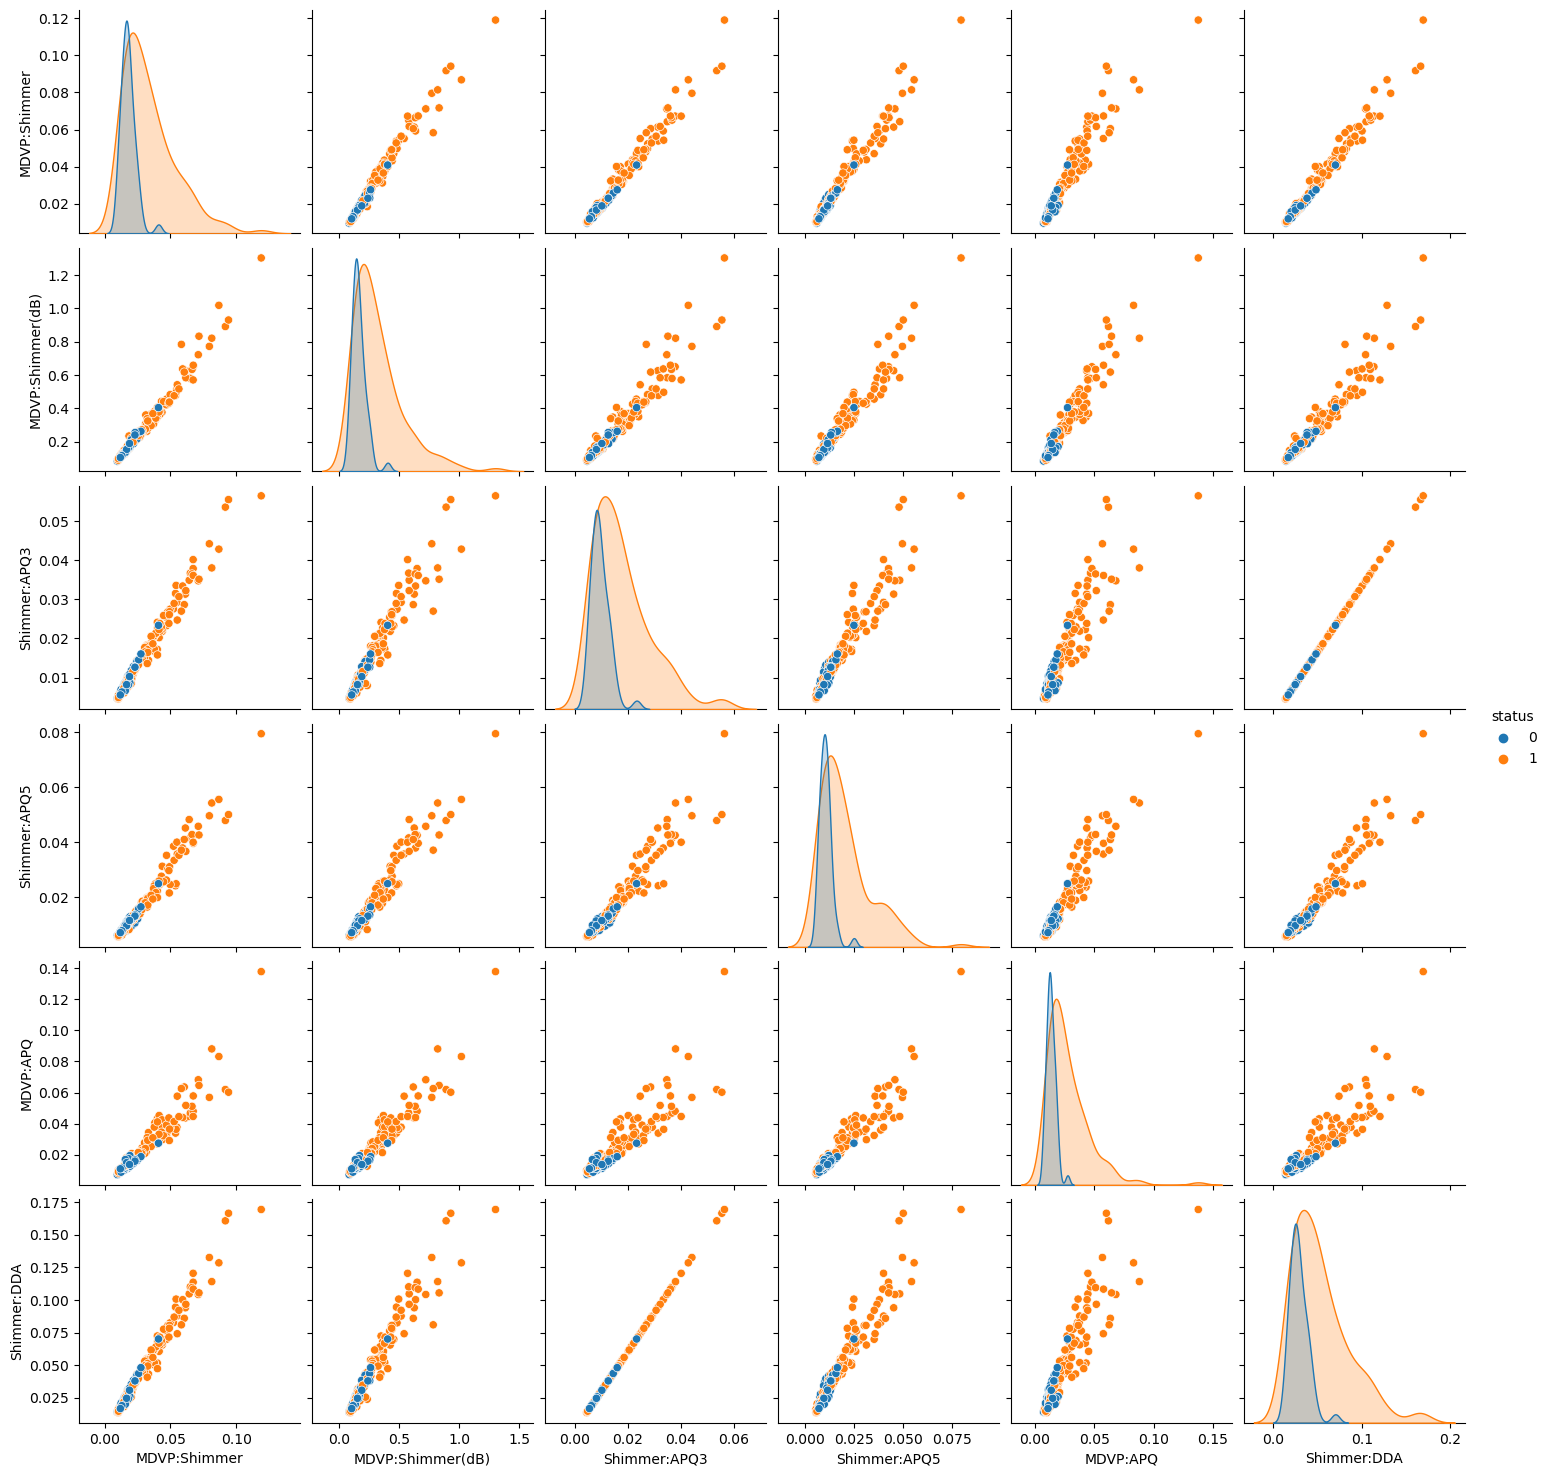

In [20]:
plt.rcParams['figure.figsize'] = (15, 4)
sns.pairplot(df,hue = 'status', vars = ['MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA'] )
plt.show()

In [16]:
# Exploring Imabalance In Dataset
df['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [19]:
# Extracting Features Into Features & Target
X = df.drop(['status'], axis=1)
y = df['status']

print('Feature (X) Shape Before Balancing :', X.shape)
print('Target (y) Shape Before Balancing :', y.shape)

Feature (X) Shape Before Balancing : (195, 22)
Target (y) Shape Before Balancing : (195,)


In [20]:
#Intialising SMOTE Object
# from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=300)

In [21]:
#Resampling Data
X, y = sm.fit_resample(X, y)

In [22]:
print('Feature (X) Shape After Balancing :', X.shape)
print('Target (y) Shape After Balancing :', y.shape)

Feature (X) Shape After Balancing : (294, 22)
Target (y) Shape After Balancing : (294,)


In [23]:
# Scaling features between -1 and 1  for mormalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((-1,1))

In [24]:
# define X_features , Y_labels
X_features = scaler.fit_transform(X)
Y_labels = y

In [25]:
# splitting the dataset into traning and testing sets into 80 - 20
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X_features, Y_labels , test_size=0.20, random_state=20)

# Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
predDT = clf.predict(X_test)
print(classification_report(y_test, predDT))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91        33
           1       0.86      0.92      0.89        26

    accuracy                           0.90        59
   macro avg       0.90      0.90      0.90        59
weighted avg       0.90      0.90      0.90        59



In [27]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' :range(1,10),
    'random_state':range(30,210,30),
    'criterion' :['gini', 'entropy']
}
CV_dt = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
CV_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'random_state': range(30, 210, 30)})

In [28]:
CV_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'sqrt',
 'random_state': 120}

In [29]:
# dt1=DecisionTreeClassifier(random_state=120, max_features='auto', max_depth=6, criterion='entropy')
dt1 = DecisionTreeClassifier(random_state=120, max_features=None, max_depth=6, criterion='entropy')
# Use 50% of features
# dt1 = DecisionTreeClassifier(random_state=120, max_features=0.5, max_depth=6, criterion='entropy')
dt1.fit(X_train, y_train)
predDT = dt1.predict(X_test) 
print(classification_report(y_test, predDT))

              precision    recall  f1-score   support

           0       0.93      0.79      0.85        33
           1       0.77      0.92      0.84        26

    accuracy                           0.85        59
   macro avg       0.85      0.86      0.85        59
weighted avg       0.86      0.85      0.85        59



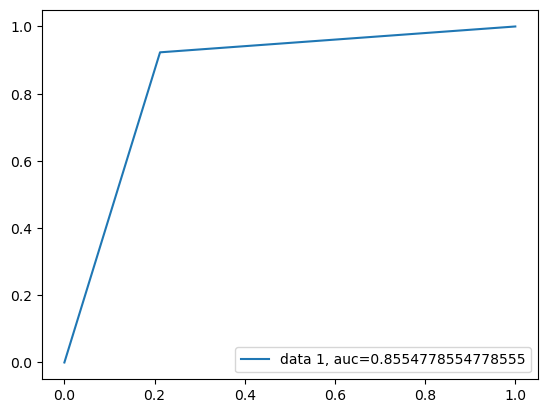

In [30]:
from sklearn import metrics
import matplotlib.pyplot as plt
y_pred_proba = dt1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# SVM Classifier

In [31]:
#Create a svm Classifier
from sklearn import svm
from sklearn import metrics

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred_svm = clf.predict(X_test)

print("SVM Test Set Accuracy:", metrics.accuracy_score(y_test, y_pred_svm))

SVM Test Set Accuracy: 0.8135593220338984


In [32]:

param_grid = {'kernel': ['linear', 'rbf'],
              'C': [0.01, 0.1],
              'gamma': [1, 0.01]}

grid_SVC = GridSearchCV(svm.SVC(), param_grid, scoring='f1', verbose=3)
grid_SVC.fit(X_train, y_train)

print("Best Parameters for SVM: ", grid_SVC.best_params_)

predSVC = grid_SVC.predict(X_test)
print("SVM Test Set Accuracy after tuning:", metrics.accuracy_score(y_test, predSVC))



Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.735 total time=   0.0s
[CV 2/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.792 total time=   0.0s
[CV 3/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.720 total time=   0.0s
[CV 4/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.829 total time=   0.0s
[CV 5/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.818 total time=   0.0s
[CV 1/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 2/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.676 total time=   0.0s
[CV 3/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.676 total time=   0.0s
[CV 4/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.676 total time=   0.0s
[CV 5/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.676 total time=   0.0s
[CV 1/5] END .C=0.01, gamma=0.01, kernel=linear;, score=0.735 total time=   0.0s
[CV 2/5] END .C=0.01, gamma=0.01, kernel=linear;,

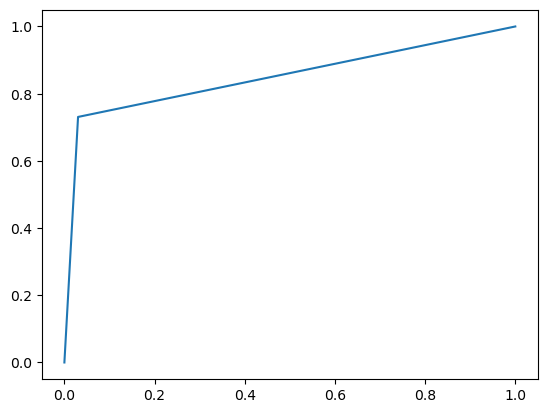

In [33]:

fpr_svm, tpr_svm, _ = metrics.roc_curve(y_test, predSVC)
auc_svm = metrics.roc_auc_score(y_test, predSVC)
plt.plot(fpr_svm, tpr_svm, label="SVM, auc=" + str(auc_svm))

# Naiver Baiyes Classifier

In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Create a Gaussian Naive Bayes Classifier
gnb = GaussianNB()

# Train the model using the training sets
gnb.fit(X_train, y_train)

# Predict the response for the test dataset
predgnb = gnb.predict(X_test)

# Print the classification report
print(classification_report(y_test, predgnb))


              precision    recall  f1-score   support

           0       0.71      0.97      0.82        33
           1       0.93      0.50      0.65        26

    accuracy                           0.76        59
   macro avg       0.82      0.73      0.74        59
weighted avg       0.81      0.76      0.75        59



In [35]:
print("Confusion Matrix:")
confusion_matrix(y_test, predgnb)

Confusion Matrix:


array([[32,  1],
       [13, 13]], dtype=int64)

In [36]:
# scores -check how efficiently labels are predicted
accuracy_testing = accuracy_score(y_test, predgnb)
print("Accuracy % :",accuracy_testing*100)

Accuracy % : 76.27118644067797


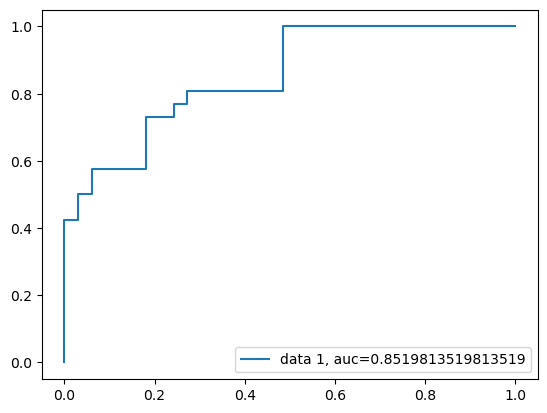

In [37]:
y_pred_proba = gnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# KNN Classifier

In [38]:
import numpy as np

Ks = 10
mean_acc = []
ConfustionMx = [];
for n in range(2,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc.append(metrics.accuracy_score(y_test, yhat))  
print('Neighbor Accuracy List')
print(mean_acc)

Neighbor Accuracy List
[0.9491525423728814, 0.9661016949152542, 0.9661016949152542, 0.9661016949152542, 0.9152542372881356, 0.9152542372881356, 0.8983050847457628, 0.9152542372881356]


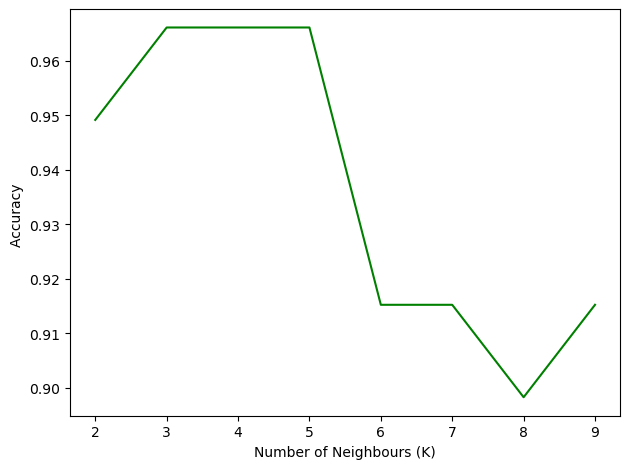

In [39]:
plt.plot(range(2,Ks),mean_acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

In [40]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predKNN = knn.predict(X_test)

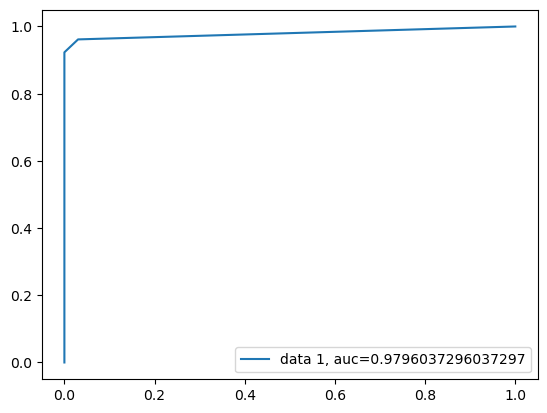

In [41]:
y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Comparision Table

In [42]:
from sklearn.metrics import precision_score,recall_score ,accuracy_score, f1_score, r2_score, log_loss

chart = {
        'Metric':["Accuracy", "F1-Score", "Recall", "Precision", "R2-Score"],
        'DT':[accuracy_score(y_test, predDT), f1_score(y_test, predDT), recall_score(y_test, predDT), precision_score(y_test, predDT), r2_score(y_test, predDT)],
        'SVM':[accuracy_score(y_test, predSVC), f1_score(y_test, predSVC), recall_score(y_test, predSVC), precision_score(y_test, predSVC), r2_score(y_test, predSVC)],
        'NB':[accuracy_score(y_test, predgnb), f1_score(y_test, predgnb), recall_score(y_test, predgnb), precision_score(y_test, predgnb), r2_score(y_test, predgnb)],
        'KNN':[accuracy_score(y_test, predKNN), f1_score(y_test, predKNN), recall_score(y_test, predKNN), precision_score(y_test, predKNN), r2_score(y_test, predKNN)],
}
chart = pd.DataFrame(chart)

In [43]:
display(chart)

Metric        DT       SVM        NB       KNN
0   Accuracy  0.847458  0.864407  0.762712  0.966102
1   F1-Score  0.842105  0.826087  0.650000  0.960000
2     Recall  0.923077  0.730769  0.500000  0.923077
3  Precision  0.774194  0.950000  0.928571  1.000000
4   R2-Score  0.381119  0.449883  0.037296  0.862471

In [44]:
data = pd.read_csv('parkinsons.csv')

# Assuming 'status' is the target variable and the rest are features
X = data.drop(columns=['name','status'], axis=1)
y = data['status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [45]:
# Initialize models
knn_model = KNeighborsClassifier(n_neighbors=5)
svm_model = SVC(kernel='linear', C=1.0)
nb_model = GaussianNB()
dt_model =  DecisionTreeRegressor()

# Train and evaluate models
models = [knn_model, svm_model, nb_model,dt_model]
model_names = ['KNN', 'SVM', 'Naive Bayes','Decision Tree']

In [46]:
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    return accuracy, confusion_mat

accuracies = []
confusion_matrices = []

for model, name in zip(models, model_names):
    accuracy, confusion_mat = train_and_evaluate(model, X_train_scaled, y_train, X_test_scaled, y_test)
    accuracies.append(accuracy)
    confusion_matrices.append(confusion_mat)
#     print(f"{name} Accuracy: {accuracy:.2f}")

# Plotting the results
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
fig.suptitle('Model Performance Comparison')

for i in range(len(models)):
    ax[i].imshow(confusion_matrices[i], cmap='Blues', interpolation='nearest')
    ax[i].set_title(f'{model_names[i]} Confusion Matrix')
    ax[i].set_xticks([0, 1])
    ax[i].set_yticks([0, 1])
    ax[i].set_xlabel('Predicted Label')
    ax[i].set_ylabel('True Label')

plt.show()


NameError: name 'X_train_scaled' is not defined

In [47]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a model (choose the best-performing one from your comparison)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_scaled, y_train)

# Function to predict whether a person has Parkinson's disease or not
def predict_parkinson(input_data):
    # Assuming 'input_data' is a dictionary with feature names as keys
    input_df = pd.DataFrame([input_data])
    input_scaled = scaler.transform(input_df)
    prediction = model.predict(input_scaled)
    return prediction[0]

import math
input_data = (122.40000,148.65000,113.81900,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.62600,0.03134,0.04518,0.04368,0.09403,0.01929,19.08500,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674)
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

# Make a prediction for the user input
prediction = predict_parkinson(input_data)

# Display the prediction
# Check the prediction and print the result
if prediction == 0:
    print(f" The Person does not have Parkinson's Disease")
else:
    print(f" The Person has Parkinson's")



 The Person has Parkinson's
